<a href="https://colab.research.google.com/github/ZachGermain/DSPS_zgermain/blob/master/HW13_zGermain/gradientDescentDemo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# gradient descent demo for 2019 DSPS

In [1]:
import pylab as pl
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [0]:
def line (m, b, x) :
    '''makes a line with parameters slope:a, intercept:b '''
    return m * x + b

In [0]:
# creting a line
x = np.arange(3, 19, 0.1)
y = 21 * x + 10

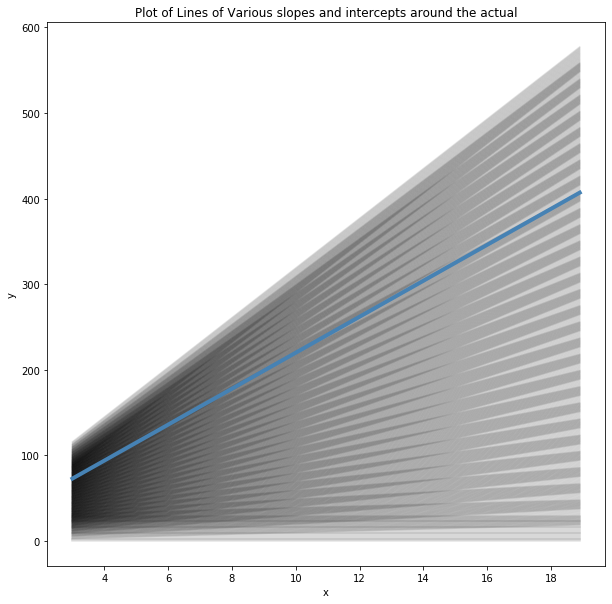

In [30]:
def loss(m, b, x, y):
    ''' L2 loss function 
    m: slope
    b: intercept
    x: data (numpy array)
    y: target (numpy array)
    ax: axis object for plot
    '''    
    return ((y - line(m, b, x))**2).sum() / x.shape[0]

res = np.zeros((30,30))
pl.figure(figsize=(10,10))
for i, m in enumerate(range(0, 30, 1)):
    for j, b in enumerate(range(0, 30, 1)):
        res[i,j] = loss(m, b, x, y)
        pl.plot(x,line(m, b, x), 'k', alpha=.1)
pl.plot(x, y, 'SteelBlue', lw=4)
pl.xlabel("x")
pl.ylabel("y");
pl.title("Plot of Lines of Various slopes and intercepts around the actual");

The blue line is the original line, the other lines are of various different slopes and intercepts.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log10
  # This is added back by InteractiveShellApp.init_path()


Text(0.5, 1.0, 'Log loss for a large range of m and b')

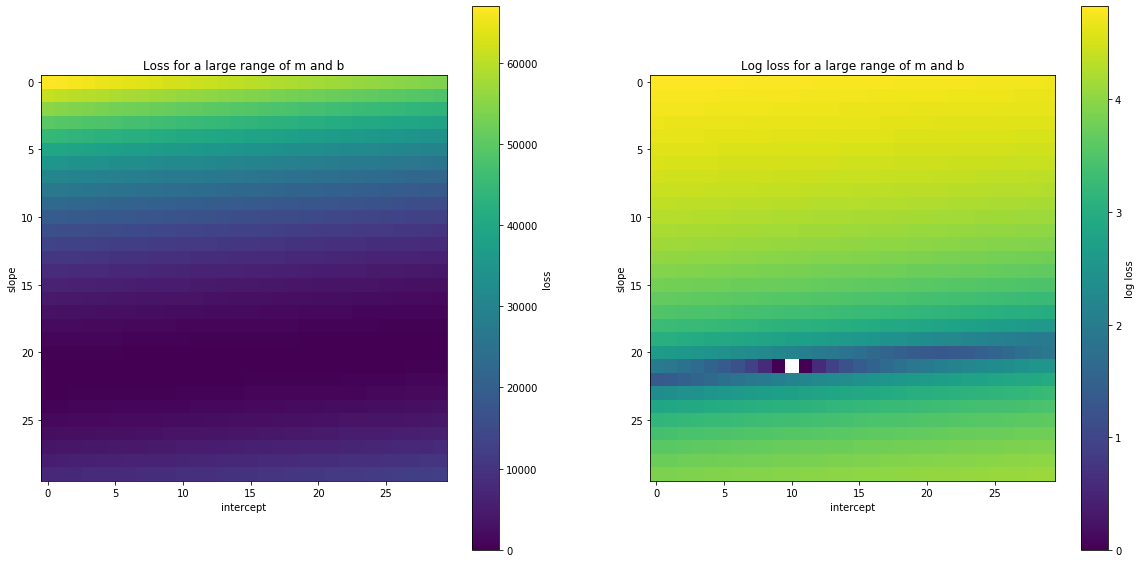

In [25]:
fig = pl.figure(figsize=(20,10))
ax1 = fig.add_subplot(121)
pl.imshow(res)
pl.colorbar(label="loss")
#pl.axis('off')
pl.xlabel("intercept")
pl.ylabel("slope");
pl.title("Loss for a large range of m and b")

ax2 = fig.add_subplot(122)
pl.imshow(np.log10(res))
pl.colorbar(label="log loss")
#pl.axis('off')
pl.xlabel("intercept")
pl.ylabel("slope");
pl.title("Log loss for a large range of m and b")

These colormaps show the values for the L2 loss function of m and b for a large range of values surrounding the original line. The loss function as itself does not make it clear where the center lies, but using the logarithm of the loss function, we can clearly find the value for m and b as around m = 21 and b = 10.

In [0]:
# create the gradient descent

def gradDesc(m, b, x, y, alpha, ax=None):
    N = len(x)
    #partial derivative: -2x(y - (mx + b)), -2(y - (mx + b))
    f_m = -2*x*(y - m*x - b)
    f_b = -2*(y - m*x - b)
    # We subtract because the derivatives point in direction of steepest ascent
    m -= f_m / float(N) * alpha
    b -= f_b / float(N) * alpha
    #print (f_m, f_b)
    if not ax is None:
      ax.plot(m, b, 'ko', alpha=0.2)

    return m, b

Loss: 3639.6956004398717
Loss: 1727.6116929463853
Loss: 1036.97616267297
Loss: 700.4466447457793
Loss: 507.8804941877785
Loss: 386.0600770738889
Loss: 303.5098870642313
Loss: 244.69993527301776
Loss: 201.17868297983264
Loss: 167.99562102084874
Loss: 142.0797470134271
Loss: 121.43621554464157
Loss: 104.71930341691784
Loss: 90.99203993468126
Loss: 79.58432344123277
Loss: 70.00574360590194
Loss: 61.89014517402369
Loss: 54.959311698582404
Loss: 48.99854746075909
Loss: 43.83987795557647
Loss: 39.350253430730426
Loss: 35.423112692289706
Loss: 31.972249850838022
Loss: 28.92728839621043
Loss: 26.230295793047866
Loss: 23.83321963928809
Loss: 21.69592383931427
Loss: 19.784668568515414
Loss: 18.070922332593135
Loss: 16.53042523283473
Loss: 15.142444161460668
Loss: 13.889176009074031
Loss: 12.755266010276532
Loss: 11.727416384097562
Loss: 10.794066326160014
Loss: 9.945128786919128
Loss: 9.171772747654483
Loss: 8.466242180747585
Loss: 7.821704764789352
Loss: 7.232124870259241
Loss: 6.69215644812051

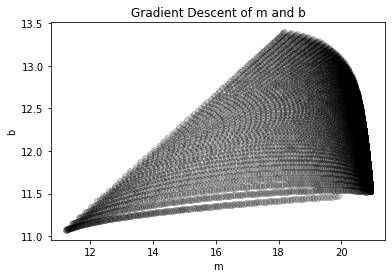

In [28]:
m0 = 11
b0 = 11
alpha = 0.2
lVal = 2
m = m0
b = b0
ax = pl.axes()

while (lVal > 1):
  m, b = gradDesc(m, b, x, y, alpha, ax)
  pl.xlabel("m")
  pl.ylabel("b")
  pl.title("Gradient Descent of m and b")
  lVal = loss(m, b, x, y)
  print("Loss: {}".format(lVal))

print("m = {0}, b = {1}".format(m[-1], b[-1]))

This is a plot of the tests of linear parameters, m - slope and b - intercept. Each point representes one choice of parameters. The darker an area, the greater amount of time the descent spent there. We can see that it got close to the actual values of the line.